In [8]:
import torch
import torch.nn as nn 


import os 


FILE_PATH = os.getcwd()
print(FILE_PATH)

/home/mohit/Desktop/mdesktop/robotics/sencillo-robotics


In [1]:
# This is a ViT model 
from datasets import load_dataset
from PIL import Image  # force Pillow import


# lets take a small image 
# ds = load_dataset("itsmohit/stl10_5percent", split='test',  cache_dir=FILE_PATH, )
ds = load_dataset('mnist', split='train[:100]', cache_dir = FILE_PATH)
print(ds)

README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/15.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/2.60M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset({
    features: ['image', 'label'],
    num_rows: 100
})


In [7]:
# Print the first element of the dataset to inspect its structure
print(ds[0])

# Correctly open the image using PIL's Image module
image = ds[0].get('image')

# Display the image to verify it was loaded correctly
image.show()

{'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7E21FC0A4CD0>, 'label': 5}


In [25]:
# visualise this image using mtl 
import numpy as np
# Convert to numpy array
img_array = np.array(image)  # shape: (128, 128, 3) for RGB

# Patch size
patch_size = 7

# Compute number of patches along height and width
num_patches_h = img_array.shape[0] // patch_size
num_patches_w = img_array.shape[1] // patch_size

# Split into patches
patches = []
for i in range(num_patches_h):
    for j in range(num_patches_w):
        patch = img_array[
            i*patch_size:(i+1)*patch_size,
            j*patch_size:(j+1)*patch_size
        ]
        patches.append(patch)

# Convert patches back to PIL images if needed
patches_pil = [Image.fromarray(p) for p in patches]

n_patches = len(patches)
print(f"Total patches: {len(patches)}")  # 128x128 / 14x14 = 64 patches
print(f"Patch shape: {patches[0].shape}")  # (14, 14, 3)

Total patches: 16
Patch shape: (7, 7)


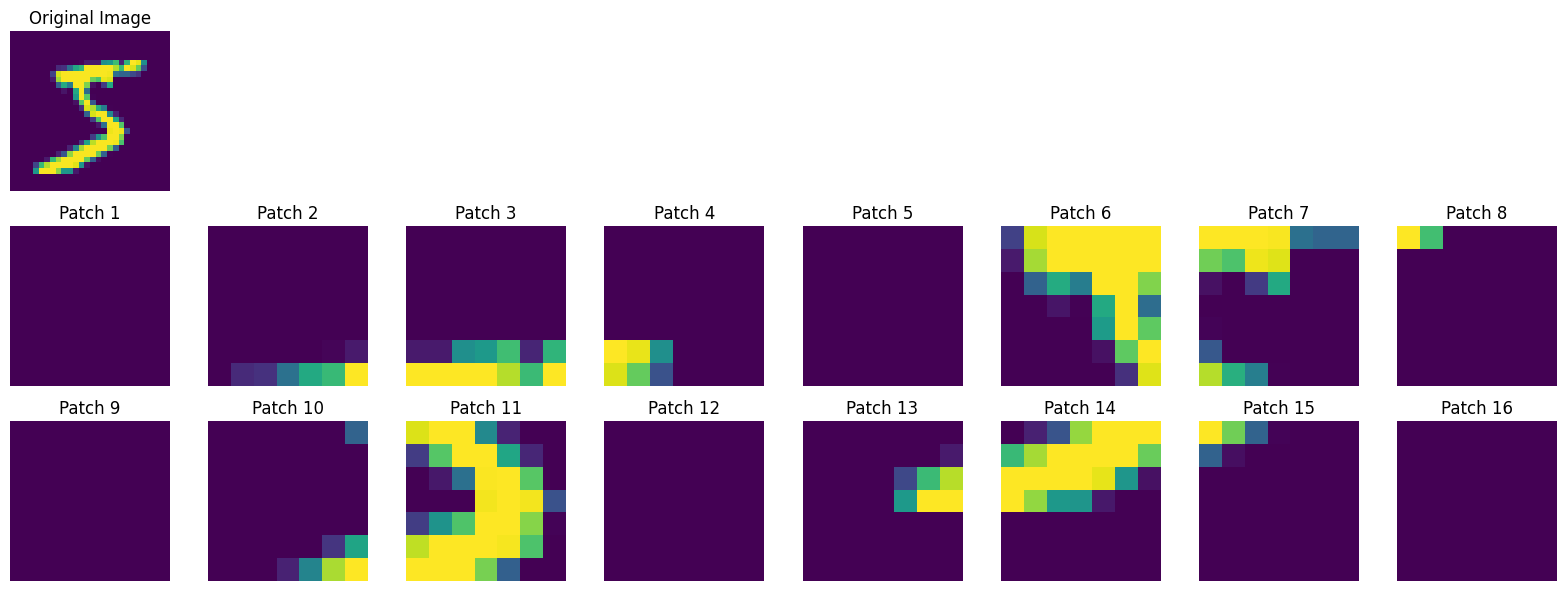

In [26]:

from math import ceil
# Parameteras for plotting
max_per_row = 8
num_patches = len(patches)
num_rows = ceil(num_patches / max_per_row)

# Create figure with original on top + patch rows
fig, axes = plt.subplots(num_rows + 1, max_per_row, figsize=(max_per_row*2, (num_rows+1)*2))

# Plot original image on top row, spanning all columns
for ax in axes[0]:
    ax.axis('off')
axes[0,0].imshow(img_array)
axes[0,0].set_title("Original Image")
for ax in axes[0,1:]:
    ax.set_visible(False)

# Plot patches
for idx, patch in enumerate(patches):
    row = (idx // max_per_row) + 1  # +1 to skip top row
    col = idx % max_per_row
    axes[row, col].imshow(patch)
    axes[row, col].set_title(f"Patch {idx+1}")
    axes[row, col].axis('off')

# Hide any empty axes
for i in range(num_patches, num_rows*max_per_row):
    row = (i // max_per_row) + 1
    col = i % max_per_row
    axes[row, col].set_visible(False)

plt.tight_layout()
plt.show()

#### The patches are divided and shown now we need to tokenize these patches
 